# 1. Import

### 1.1 Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Importing the dataset

In [2]:
car_df = pd.read_csv('cars.csv',header=None)

In [3]:
car_df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car_df.columns = ['buying','maint','doors','persons','llug_boot','safity','classes']

In [5]:
car_df.head()

,buying,maint,doors,persons,llug_boot,safity,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 2. Preprocessing

In [6]:
df = car_df.copy()

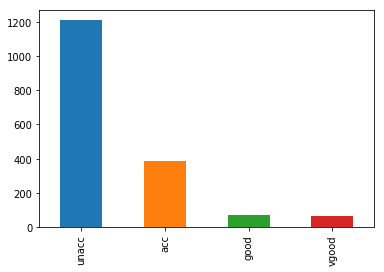

In [7]:
df['classes'].value_counts().plot.bar()

### 2.1 Missing Values

In [8]:
df.isnull().sum()

buying       0
maint        0
doors        0
persons      0
llug_boot    0
safity       0
classes      0
dtype: int64

### 2.2 Encoding

In [9]:
colname = df.columns
from sklearn import preprocessing
le = {}
for x in colname:
    le[x] = preprocessing.LabelEncoder()
for x in colname:
    df[x] = le[x].fit_transform(df[x])

In [10]:
df.head()

,buying,maint,doors,persons,llug_boot,safity,classes
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


### 2.3 Dependent and Independent variable

In [11]:
X = df.copy()
y = X.pop('classes')

### 2.4 Scaling

In [12]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

### 2.5 Training and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.3,random_state=1)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1209, 6), (519, 6), (1209,), (519,))

# 3.Building the Model

## 3.1 Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier(random_state=1,min_samples_leaf=2)
m.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = m.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print(cm)
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

[[104   0   7   0]
 [  5  17   0   0]
 [ 10   0 358   0]
 [  0   2   0  16]]
             precision    recall  f1-score   support

          0       0.87      0.94      0.90       111
          1       0.89      0.77      0.83        22
          2       0.98      0.97      0.98       368
          3       1.00      0.89      0.94        18

avg / total       0.95      0.95      0.95       519

0.953757225433526


In [16]:
m.feature_importances_

array([0.21766795, 0.20474167, 0.05637568, 0.16599048, 0.10775403,
       0.2474702 ])

In [17]:
# Drawing the tree
from sklearn import tree
with open('m','w') as f:
    f = tree.export_graphviz(m,feature_names=X_train.columns,out_file=f)

## 3.2 SVC

In [18]:
from sklearn.svm import SVC
m = SVC(C=70)
m.fit(X_train,y_train)

SVC(C=70, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = m.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print(cm)
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

[[109   2   0   0]
 [  2  20   0   0]
 [  1   0 367   0]
 [  1   0   0  17]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       111
          1       0.91      0.91      0.91        22
          2       1.00      1.00      1.00       368
          3       1.00      0.94      0.97        18

avg / total       0.99      0.99      0.99       519

0.9884393063583815


## 3.3 Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = m.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print(cm)
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

[[ 24   0  83   4]
 [  2   0  20   0]
 [ 34   0 334   0]
 [  7   0  10   1]]
             precision    recall  f1-score   support

          0       0.36      0.22      0.27       111
          1       0.00      0.00      0.00        22
          2       0.75      0.91      0.82       368
          3       0.20      0.06      0.09        18

avg / total       0.61      0.69      0.64       519

0.6917148362235067


C:\Users\SONU KUMAR JHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 3.4 Extra Trees Classifier

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
m = ExtraTreesClassifier(200)
m.fit(X_train,y_train)

C:\Users\SONU KUMAR JHA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = m.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print(cm)
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

[[106   0   5   0]
 [  7  15   0   0]
 [  7   0 361   0]
 [  1   0   0  17]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.91       111
          1       1.00      0.68      0.81        22
          2       0.99      0.98      0.98       368
          3       1.00      0.94      0.97        18

avg / total       0.96      0.96      0.96       519

0.9614643545279383


## 3.5 Random Forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(max_features=.5,n_estimators=501)
m.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=501, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = m.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print(cm)
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

[[107   0   4   0]
 [  3  19   0   0]
 [  8   0 360   0]
 [  0   0   0  18]]
             precision    recall  f1-score   support

          0       0.91      0.96      0.93       111
          1       1.00      0.86      0.93        22
          2       0.99      0.98      0.98       368
          3       1.00      1.00      1.00        18

avg / total       0.97      0.97      0.97       519

0.9710982658959537


## 3.6 Boosting

### 3.6.1 AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
m = AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                      n_estimators=10)
m.fit(X_train,y_train)

y_pred = m.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print(cm)
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

[[107   1   3   0]
 [  6  16   0   0]
 [ 28   0 340   0]
 [  4   1   0  13]]
             precision    recall  f1-score   support

          0       0.74      0.96      0.84       111
          1       0.89      0.73      0.80        22
          2       0.99      0.92      0.96       368
          3       1.00      0.72      0.84        18

avg / total       0.93      0.92      0.92       519

0.9171483622350675


### 3.6.2 Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
m = GradientBoostingClassifier()
m.fit(X_train,y_train)

y_pred = m.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print(cm)
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

[[107   2   2   0]
 [  2  20   0   0]
 [  6   0 362   0]
 [  0   0   0  18]]
             precision    recall  f1-score   support

          0       0.93      0.96      0.95       111
          1       0.91      0.91      0.91        22
          2       0.99      0.98      0.99       368
          3       1.00      1.00      1.00        18

avg / total       0.98      0.98      0.98       519

0.976878612716763


### 3.6.3 Ensemble

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# create the sub models
estimators = []
# model1 = LogisticRegression()
# estimators.append(('log', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(kernel="rbf", C=100,gamma=0.1)
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
estimators.append(('knn', model4))
print(estimators)

[('cart', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('svm', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]


In [47]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
Y_pred=ensemble.predict(X_val)
# print(Y_pred)

C:\Users\SONU KUMAR JHA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
y_pred = m.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print(cm)
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

[[107   2   2   0]
 [  2  20   0   0]
 [  6   0 362   0]
 [  0   0   0  18]]
             precision    recall  f1-score   support

          0       0.93      0.96      0.95       111
          1       0.91      0.91      0.91        22
          2       0.99      0.98      0.99       368
          3       1.00      1.00      1.00        18

avg / total       0.98      0.98      0.98       519

0.976878612716763
